## Laboratorio
 - Limpiar un set de datos con pandas

- Un set de datos que tengan permisos para compartir con nosotros
Más de 100000 registros
Más de 20 columnas

Con datos con cadenas, números, fechas, y categorías.

Usar los permisos de edificación de San Francisco:

[1] https://www.kaggle.com/aparnashastry/building-permit-applications-data/data

In [1]:
import pandas as pd
import numpy as np
# set seed for reproducibility
np.random.seed(1234) 

### 1.1 Verificar que no hay problemas en la importación

In [2]:
# Leemos el archivo. Veamos si tenemos algun inconveniente...
building_pa = pd.read_csv('Building_Permits.csv')
building_pa.head(5)

/home/felix/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


#### Resultado: Observamos que se levantan algunos warnings, pero se efectua igualmente la lectura del archivo.

In [3]:
# Veamos algunas muestras
building_pa.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
61449,M518490,8,otc alterations permit,09/18/2014,0346,010,454,NaN,Larkin,St,...,NaN,NaN,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78220398073105, -122.41708215854908)",1355947234112
75024,201502057649,8,otc alterations permit,02/05/2015,2860,021,29,NaN,Mendosa,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,7.0,West of Twin Peaks,94116.0,"(37.74879801092396, -122.46556796364534)",1370231146100
23122,201308285481,8,otc alterations permit,08/28/2013,2881,011,180,NaN,Dorantes,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,7.0,West of Twin Peaks,94116.0,"(37.74542138442733, -122.46468687999361)",1315807146400
110307,201512316217,2,new construction wood frame,12/31/2015,4224,022,1058,NaN,Mississippi,St,...,NaN,NaN,5.0,wood frame (5),Y,10.0,Potrero Hill,94107.0,"(37.753003357105, -122.39398199498024)",1408022484511
4861,201302210595,8,otc alterations permit,02/21/2013,0289,009,180,NaN,Montgomery,St,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Financial District/South Beach,94104.0,"(37.790728059975955, -122.4019787202529)",129667667090


No parece haber ningun inconveniente con los datos. Veamos que lo importado se corresponda con lo informado en [1]. Para ello descargamos el archivo correspondiente a DataDictionaryBuildings.xlsx y lo convertimos en DataDictionaryBuildings.cvs

In [4]:
building_pa_specs = pd.read_csv('DataDictionaryBuildingPermit.csv')
building_pa_specs

,Sl No,Column name,Description
0,1,Permit Number,Number assigned while filing
1,2,Permit Type,Type of the permit represented numerically.
2,3,Permit Type Definition,"Description of the Permit type, for example\n ..."
3,4,Permit Creation Date,"Date on which permit created, later than \nor ..."
4,5,Block,Related to address
5,6,Lot,Related to address
6,7,Street Number,Related to address
7,8,Street Number Suffix,Related to address
8,9,Street Name,Related to address
9,10,Street Name Suffix,Related to address


In [5]:
# A priori tenemos la misma cantidad de columnas, veamos que se corresponden los nombres 
set(list(building_pa_specs['Column name'].values))==set(list(building_pa.columns))

False

In [6]:
# Hubiera esperado que sean iguales, veamos las diferencias
check_list=[]
check_list_idx=[]
specs=list(set(list(building_pa_specs['Column name'].values)))
raw_data=list(set(building_pa.columns));    
for x in specs:
    if x in raw_data:
        pass
    else:
        check_list.append((x,'FAIL'))
check_list

[('Street Name Suffix', 'FAIL'), ('Unit suffix', 'FAIL')]

In [7]:
# Veamos que no tengamos un tema con upper & lower case
check_list=[]
check_list_idx=[]
specs=[x.lower().strip() for x in list(set(list(building_pa_specs['Column name'].values)))]
raw_data=[x.lower().strip() for x in list(set(building_pa.columns))];    
for x in specs:
    if x in raw_data:
        pass
    else:
        check_list.append((x,'FAIL'))
check_list

[('street name suffix', 'FAIL')]

In [8]:
#Arreglamos uno pero seguimos con uno en falta. Veamos solo aquellos de street
specs=[x for x in list(set(list(building_pa_specs['Column name'].values))) if x.lower().find('street')>=0]
raw_data=[x for x in list(set(building_pa.columns)) if x.lower().find('street')>=0];    
print(specs)
print(raw_data)

['Street Number Suffix', 'Street Name Suffix', 'Street Number', 'Street Name']
['Street Number Suffix', 'Street Number', 'Street Name', 'Street Suffix']


Entonces las columnas son consistentes con la salvedad que en lo importado se toma una columna como "Street Suffix" que se corresponde con las especificaciones en "Street Name Suffix".

#### Resultado: Ok entre lo importado y las especificaciones.

Veamos si tenemos duplicados

In [9]:
building_pa[building_pa.duplicated()]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


*NO tenemos duplicados*

Acomodamos los nombres en las columnas. Buscamos que no tengan caracteres extraños (seguimos lo indicado en la actividad de clase). Ademas removemos los espacios en blanco y los guiones medios.

In [10]:
building_pa.columns[building_pa.columns != building_pa.columns.str.extract(r'^(\w+)$')] 

/home/felix/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Street Number', 'Street Number Suffix',
       'Street Name', 'Street Suffix', 'Unit Suffix', 'Current Status',
       'Current Status Date', 'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries',
       'Record ID'],
      dtype='object')

In [11]:
# Vemos que existen un gran numero de casos. Removemos los espacios guiones medios y hacemos todo en minusculas
building_pa.columns = building_pa.columns.str.replace(' ', '_')
building_pa.columns = building_pa.columns.str.replace('-', '_')
building_pa.columns = building_pa.columns.str.lower()
building_pa.head()

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,...,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods___analysis_boundaries,zipcode,location,record_id
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [12]:
# En esta instancia guardamos una copia de la informacion. Dado que no utilizamos ninguna de las columnas actualmente como index, no guardamos el indice que  genera pandas al importar el csv
building_pa.to_csv("buildding_00.csv",index=False)

In [13]:
# De paso recolectemos aquellas columnas que tengan o indiquen un formato  "date"
cdate=[x for x in building_pa.columns if 'date' in x]
cdate
# Estas las podriamos utilizar de ser necesario en la importacion.

['permit_creation_date',
 'current_status_date',
 'filed_date',
 'issued_date',
 'completed_date',
 'first_construction_document_date',
 'permit_expiration_date']

In [14]:
# ahora leamos nuestra copia. Todavia no incorporamos los dates en la importacion.
building_pa_prc=pd.read_csv("buildding_00.csv")

/home/felix/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
building_pa_prc.sample(5)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,...,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods___analysis_boundaries,zipcode,location,record_id
79051,M569207,8,otc alterations permit,03/16/2015,0738,045,851,NaN,Van Ness,Av,...,NaN,NaN,NaN,NaN,NaN,5.0,Western Addition,94109.0,"(37.78352001681492, -122.42135595280895)",1374474454115
67199,201411121203,8,otc alterations permit,11/12/2014,0612,014,2454,NaN,Clay,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Pacific Heights,94115.0,"(37.79106857896029, -122.4335358615013)",1361977235889
156066,M782808,8,otc alterations permit,05/03/2017,1269,091,117,NaN,Downey,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Haight Ashbury,94117.0,"(37.766642910186725, -122.44732153589197)",146175294714
133004,M712287,8,otc alterations permit,08/09/2016,2768,022A,4044,NaN,22nd,St,...,NaN,NaN,NaN,NaN,NaN,8.0,Noe Valley,94114.0,"(37.75448240957461, -122.43738123190849)",1433116143685
30303,201311061284,8,otc alterations permit,11/06/2013,3705,055,845,NaN,Market,St,...,1.0,constr type 1,1.0,constr type 1,NaN,6.0,South of Market,94103.0,"(37.78409697317651, -122.40610191652476)",1323360472807


In [16]:
# Veamos una descripcion que incluya todo los casos (numericos y no numericos)
building_pa_prc.describe(include='all')

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_number_suffix,street_name,street_suffix,...,existing_construction_type,existing_construction_type_description,proposed_construction_type,proposed_construction_type_description,site_permit,supervisor_district,neighborhoods___analysis_boundaries,zipcode,location,record_id
count,198900,198900.000000,198900,198900,198900,198900,198900.000000,2216,198900,196132,...,155534.000000,155534,155738.000000,155738,5359,197183.000000,197175,197184.000000,197200,1.989000e+05
unique,181495,NaN,8,1291,4896,1055,NaN,18,1704,21,...,NaN,5,NaN,5,1,NaN,41,NaN,57604,NaN
top,201602179765,NaN,otc alterations permit,09/15/2017,3708,001,NaN,A,Market,St,...,NaN,wood frame (5),NaN,wood frame (5),Y,NaN,Financial District/South Beach,NaN,"(37.79226164705184, -122.4034859571375)",NaN
freq,101,NaN,178844,413,1195,10114,NaN,1501,5443,138358,...,NaN,113350,NaN,114382,5359,NaN,21816,NaN,554,NaN
mean,NaN,7.522323,NaN,NaN,NaN,NaN,1121.728944,NaN,NaN,NaN,...,4.072878,NaN,4.089529,NaN,NaN,5.538403,NaN,94115.500558,NaN,1.162048e+12
std,NaN,1.457451,NaN,NaN,NaN,NaN,1135.768948,NaN,NaN,NaN,...,1.585756,NaN,1.578766,NaN,NaN,2.887041,NaN,9.270131,NaN,4.918215e+11
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,94102.000000,NaN,1.293532e+10
25%,NaN,8.000000,NaN,NaN,NaN,NaN,235.000000,NaN,NaN,NaN,...,3.000000,NaN,3.000000,NaN,NaN,3.000000,NaN,94109.000000,NaN,1.308567e+12
50%,NaN,8.000000,NaN,NaN,NaN,NaN,710.000000,NaN,NaN,NaN,...,5.000000,NaN,5.000000,NaN,NaN,6.000000,NaN,94114.000000,NaN,1.371840e+12
75%,NaN,8.000000,NaN,NaN,NaN,NaN,1700.000000,NaN,NaN,NaN,...,5.000000,NaN,5.000000,NaN,NaN,8.000000,NaN,94122.000000,NaN,1.435000e+12


*Observamos que tenemos muchos valores faltantes o NaN. Vamos a indagar mas sobre este punto*

### Analisis de datos faltantes o NaNs

In [17]:
# Veamos el tamaño del dataset completo
building_pa_prc.shape

(198900, 43)

In [18]:
# De: https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values
# isnull alias for isna (http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.isna.html)
# get the number of missing data points per column
missing_values_count = building_pa_prc.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[:]

permit_number                                  0
permit_type                                    0
permit_type_definition                         0
permit_creation_date                           0
block                                          0
lot                                            0
street_number                                  0
street_number_suffix                      196684
street_name                                    0
street_suffix                               2768
unit                                      169421
unit_suffix                               196939
description                                  290
current_status                                 0
current_status_date                            0
filed_date                                     0
issued_date                                14940
completed_date                            101709
first_construction_document_date           14946
structural_notification                   191978
number_of_existing_s

*Vemos que existen numerosas columnas con un gran numero de faltantes. Lo veamos mejor en un grafico*

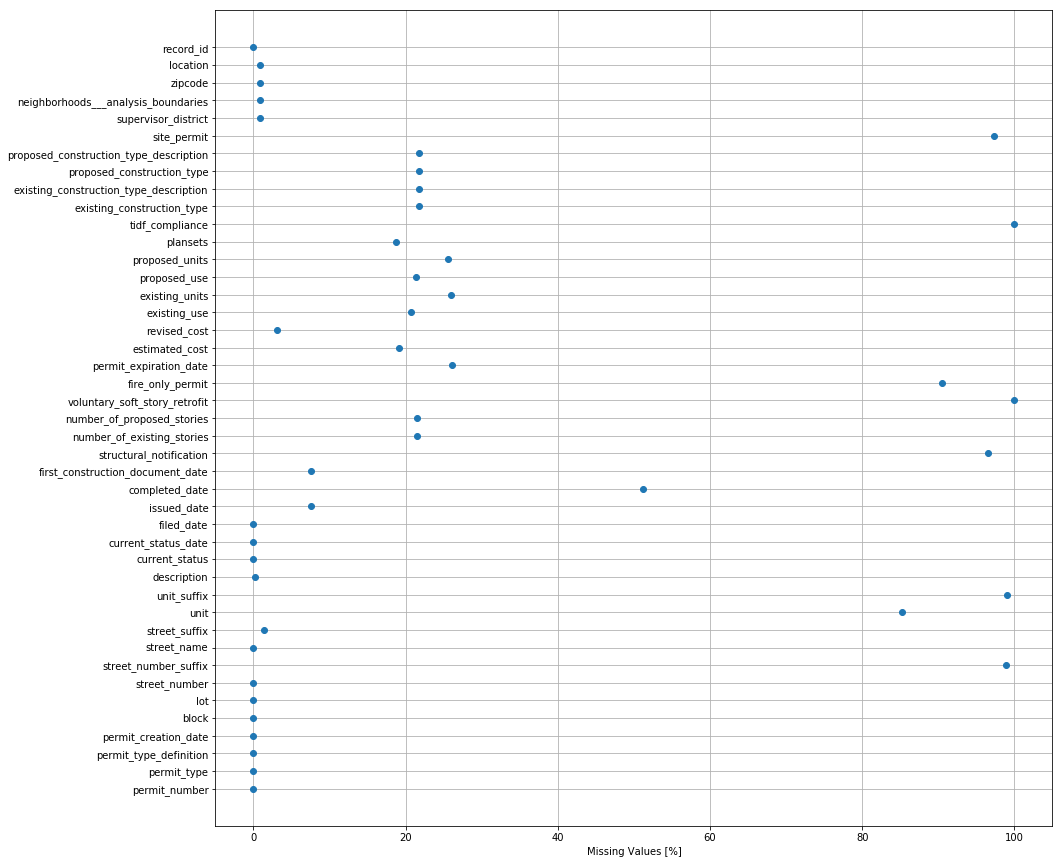

In [20]:
import matplotlib.pyplot as plt
x=missing_values_count.index
y=(missing_values_count.values/building_pa_prc.shape[0])*100
plt.figure(figsize=(15,15))
plt.plot(y,x,'o')
plt.xlabel('Missing Values [%]')
plt.grid(True)
plt.show()

In [21]:
# Si bien eliminar features no es lo ideal, intentar completar algo con faltantes del mas del 20% de los datos tambien parece serlo. 
# En primera intancia nos quedaremos con aquellas columnas que tengan menos de un 20% de datos faltantes (eleccion arbitraria).
filt_cols=y>20

In [22]:
cols_filt=building_pa_prc.columns[filt_cols]
cols_filt

Index(['street_number_suffix', 'unit', 'unit_suffix', 'completed_date',
       'structural_notification', 'number_of_existing_stories',
       'number_of_proposed_stories', 'voluntary_soft_story_retrofit',
       'fire_only_permit', 'permit_expiration_date', 'existing_use',
       'existing_units', 'proposed_use', 'proposed_units', 'tidf_compliance',
       'existing_construction_type', 'existing_construction_type_description',
       'proposed_construction_type', 'proposed_construction_type_description',
       'site_permit'],
      dtype='object')

In [23]:
building_pa_prc_shrink=building_pa_prc.drop(columns=cols_filt)
building_pa_prc_shrink.head()

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_name,street_suffix,description,...,issued_date,first_construction_document_date,estimated_cost,revised_cost,plansets,supervisor_district,neighborhoods___analysis_boundaries,zipcode,location,record_id
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,11/09/2015,11/09/2015,4000.0,4000.0,2.0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,08/03/2017,08/03/2017,1.0,500.0,2.0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,NaN,NaN,20000.0,NaN,2.0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,07/18/2017,07/18/2017,2000.0,2000.0,2.0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,12/01/2017,11/20/2017,100000.0,100000.0,2.0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [24]:
# aprovechamos y salvamos este nuevo set
building_pa_prc_shrink.to_csv("buildding_01.csv",index=False)
# y recargamos la informacion nuevamente

In [25]:
building_pa_prc_shrink=pd.read_csv('buildding_01.csv',parse_dates=['permit_creation_date'])

In [26]:
building_pa_prc_shrink.sample(5)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_name,street_suffix,description,...,issued_date,first_construction_document_date,estimated_cost,revised_cost,plansets,supervisor_district,neighborhoods___analysis_boundaries,zipcode,location,record_id
99238,201509177324,8,otc alterations permit,2015-09-17,0195,001,735,Montgomery,St,revision topaa# 201408143822. administrative p...,...,09/17/2015,09/17/2015,1.0,1.0,2.0,3.0,Chinatown,94111.0,"(37.79621627942539, -122.40375479881872)",139613362223
148286,M756329,8,otc alterations permit,2017-01-26,2999,025,215,Molimo,Dr,street space & sidewalk repair,...,01/26/2017,01/26/2017,NaN,1.0,NaN,7.0,West of Twin Peaks,94127.0,"(37.736792297680694, -122.44966416818805)",1451407149405
143005,201611173064,8,otc alterations permit,2016-11-17,0181,005A,1323,Mason,St,reroofing,...,11/17/2016,11/17/2016,24700.0,25000.0,0.0,3.0,Nob Hill,94133.0,"(37.79566146643126, -122.4119500949001)",144485761742
26358,201309308048,8,otc alterations permit,2013-09-30,0104,043,143,Varennes,St,reroofing,...,09/30/2013,09/30/2013,5600.0,5600.0,0.0,3.0,North Beach,94133.0,"(37.80126884133273, -122.40704682151585)",131918759012
154961,201704194385,8,otc alterations permit,2017-04-19,0827,025,861,Fell,St,build a foundation wall around gas meter per p...,...,04/19/2017,04/19/2017,50000.0,50000.0,2.0,5.0,Hayes Valley,94117.0,"(37.77449457898716, -122.43196945714732)",1460121237459


In [27]:
#veamos los dtypes
building_pa_prc_shrink.dtypes

permit_number                                  object
permit_type                                     int64
permit_type_definition                         object
permit_creation_date                   datetime64[ns]
block                                          object
lot                                            object
street_number                                   int64
street_name                                    object
street_suffix                                  object
description                                    object
current_status                                 object
current_status_date                            object
filed_date                                     object
issued_date                                    object
first_construction_document_date               object
estimated_cost                                float64
revised_cost                                  float64
plansets                                      float64
supervisor_district         

In [28]:
# Segun se indica en DataDictionaryBuildingPermit.csv permit number es del tipo number pero vemos que lo interpreta como object
# De la simple revision se puede observar casos donde el permit number es MXXXXXX y parece estar relacionado con permit_creation_Date
building_pa_prc_shrink[building_pa_prc_shrink.columns[0:5]].head(10)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block
0,201505065519,4,sign - erect,2015-05-06,0326
1,201604195146,4,sign - erect,2016-04-19,0306
2,201605278609,3,additions alterations or repairs,2016-05-27,0595
3,201611072166,8,otc alterations permit,2016-11-07,0156
4,201611283529,6,demolitions,2016-11-28,0342
5,201706149344,8,otc alterations permit,2017-06-14,4105
6,201706300814,8,otc alterations permit,2017-06-30,1739
7,M803667,8,otc alterations permit,2017-06-30,4789
8,M804227,8,otc alterations permit,2017-07-05,1212
9,M804767,8,otc alterations permit,2017-07-06,1259


Vemos que el permit_number es el permit creation date en formato iso mas un codigo (En aquellos casos que no tienen MXXXXX).

In [29]:
filt_M=building_pa_prc_shrink.permit_number.str.contains('M')

In [30]:
pd_aux=pd.DataFrame(building_pa_prc_shrink[['permit_number','permit_creation_date']][filt_M])
pd_aux.sort_values(by=['permit_creation_date'],inplace=True)
pd_aux.head(20)

,permit_number,permit_creation_date
577,M364427,2013-01-02
574,M364408,2013-01-02
573,M364407,2013-01-02
558,M364389,2013-01-02
557,M364388,2013-01-02
550,M364368,2013-01-02
548,M364367,2013-01-02
544,M364348,2013-01-02
543,M364347,2013-01-02
552,M364387,2013-01-02


Se puede ver que los caracteres MXX parecen incrementar cada uns cierta cantidad de dias.
**HIP: Vamos a utilizar el mismo criterio que se observa en los restantes campos de permit_number en building_pa_prc_shrink junto a lo observado en pd_aux para unificar el formato del primero.**

In [31]:
pd_aux['permit_number_notM']=pd_aux['permit_creation_date'].apply(lambda x: str(x)[0:10].replace('-',''))+pd_aux['permit_number'].apply(lambda x: x[3:])
pd_aux.head(5)

,permit_number,permit_creation_date,permit_number_notM
577,M364427,2013-01-02,201301024427
574,M364408,2013-01-02,201301024408
573,M364407,2013-01-02,201301024407
558,M364389,2013-01-02,201301024389
557,M364388,2013-01-02,201301024388


In [32]:
building_pa_prc_shrink.loc[pd_aux.index, 'permit_number']=pd_aux.permit_number_notM

In [33]:
# aprovechamos y salvamos este nuevo set
building_pa_prc_shrink.to_csv("buildding_02.csv",index=False)
# y recargamos la informacion nuevamente
building_pa_prc_shrink=pd.read_csv('buildding_02.csv',parse_dates=['permit_creation_date'])

In [34]:
building_pa_prc_shrink.dtypes

permit_number                                   int64
permit_type                                     int64
permit_type_definition                         object
permit_creation_date                   datetime64[ns]
block                                          object
lot                                            object
street_number                                   int64
street_name                                    object
street_suffix                                  object
description                                    object
current_status                                 object
current_status_date                            object
filed_date                                     object
issued_date                                    object
first_construction_document_date               object
estimated_cost                                float64
revised_cost                                  float64
plansets                                      float64
supervisor_district         

De esta forma vemos que se interpreto en forma correcta el campo *permit_number*.

In [35]:
# Para el caso de zip code y location y dado que son pocos (en virtud de lo observado anteriormente) vamos a desprendernos de aquellos casos en los cuales
# no tengamos ni uno ni otro. Puesto que si tenemos uno podriamos llegar a tener el otro
filt_zip_loc=~np.logical_and(building_pa_prc_shrink[['zipcode']].isna().values ,building_pa_prc_shrink[['location']].isna().values)

In [36]:
building_pa_prc_zip_loc=building_pa_prc_shrink[filt_zip_loc]

In [37]:
building_pa_prc_zip_loc.sample(20)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_name,street_suffix,description,...,issued_date,first_construction_document_date,estimated_cost,revised_cost,plansets,supervisor_district,neighborhoods___analysis_boundaries,zipcode,location,record_id
101714,201510099302,8,otc alterations permit,2015-10-09,0277,006A,1106,Bush,St,"remove lath & plaster for 200 sq. ft., reinsta...",...,10/09/2015,10/09/2015,3000.0,3000.0,0.0,3.0,Nob Hill,94109.0,"(37.78947187294936, -122.41567370058515)",1398765233490
50291,201406057603,8,otc alterations permit,2014-06-05,0844,007,728,Page,St,seismic upgrade for soft story as per s.f. bui...,...,07/01/2014,07/01/2014,50000.0,55000.0,2.0,5.0,Haight Ashbury,94117.0,"(37.77304191444401, -122.43285639922789)",1344255396254
135248,201608316450,8,otc alterations permit,2016-08-31,0851,013,300,Buchanan,St,unit #102; 2/f: remodel (e) bathroom & kitchen...,...,09/13/2016,09/13/2016,38000.0,38000.0,2.0,5.0,Hayes Valley,94102.0,"(37.77283581161558, -122.42696718762289)",143568083121
182499,201709148173,8,otc alterations permit,2017-09-14,5658,016,225,Banks,St,"revision to permit # 201609137585, install (n)...",...,09/14/2017,09/14/2017,1.0,1.0,0.0,9.0,Bernal Heights,94110.0,"(37.73988596183948, -122.41252259039399)",1479236186057
164,201707141931,2,new construction wood frame,2017-07-14,1193,048,2150,Hayes,St,construct (n) 3-story type 5a construction 9 r...,...,NaN,NaN,1620000.0,NaN,2.0,5.0,Lone Mountain/USF,94117.0,"(37.77347316353236, -122.45200535060522)",147059391960
18158,201307101507,4,sign - erect,2013-07-10,1691,019,850,La Playa,NaN,install non electric interior wall sign,...,07/18/2013,07/18/2013,2000.0,2000.0,2.0,1.0,Outer Richmond,94121.0,"(37.7723549085925, -122.50942725844205)",1310623368207
101375,201510079037,8,otc alterations permit,2015-10-07,2609,033,59,Buena Vista,Tr,reroofing.,...,10/07/2015,10/07/2015,18800.0,18800.0,0.0,8.0,Castro/Upper Market,94117.0,"(37.7679215268358, -122.43796403339688)",1398398139175
45511,201404213715,8,otc alterations permit,2014-04-21,2310,001,2201,39th,Av,demolish existing 1/2 bath on gr fl. construct...,...,04/22/2014,04/22/2014,20000.0,20000.0,2.0,4.0,Sunset/Parkside,94116.0,"(37.745681008828114, -122.4976114411286)",1339278130493
97000,201508275479,8,otc alterations permit,2015-08-27,7099,012,5666,Mission,St,reroofing,...,08/27/2015,08/27/2015,40600.0,40600.0,0.0,11.0,Outer Mission,94112.0,"(37.71059057541355, -122.44846249933188)",1393710221411
131839,201607289152,8,otc alterations permit,2016-07-28,1269,172,819,Ashbury,St,street space permit,...,07/28/2016,07/28/2016,NaN,1.0,NaN,5.0,Haight Ashbury,94117.0,"(37.7668420517898, -122.44659960596616)",143177594792


Text(0.5,0,'zipcode')

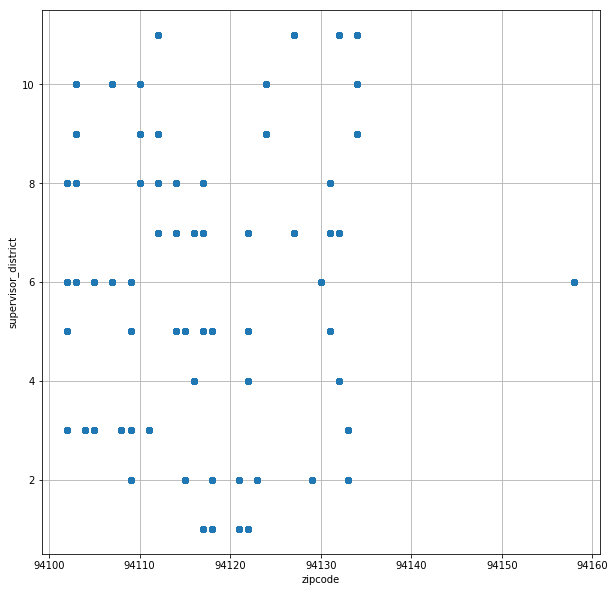

In [39]:
# Otra relacion que podriamos explorar es la de los supervisors
plt.figure(figsize=(10,10))
plt.plot(building_pa_prc_shrink['zipcode'],building_pa_prc_shrink['supervisor_district'],'o')
plt.grid(True)
plt.ylabel('supervisor_district')
plt.xlabel('zipcode')

De este grafico podemos indicar que no podriamos haber construido facilmente la informacion del zipcode por el supervisor que lo visitaba. Puesto que diversos supervisores visitaban mismos zipcodes .

In [40]:
# aprovechamos y salvamos este nuevo set
building_pa_prc_zip_loc.to_csv("buildding_03.csv",index=False)
# y recargamos la informacion nuevamente
building_pa_prc_zip_loc=pd.read_csv('buildding_03.csv',parse_dates=['permit_creation_date'])

### Comentarios

Notemos que podriamos seguir comprimiendo el dataset. En principio ciertas variables categoricas podrian ser omitidas en tanto su definicion sea univoca. Analicemos algunos casos.

In [41]:
building_pa_prc_zip_loc.head(5)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_name,street_suffix,description,...,issued_date,first_construction_document_date,estimated_cost,revised_cost,plansets,supervisor_district,neighborhoods___analysis_boundaries,zipcode,location,record_id
0,201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,11/09/2015,11/09/2015,4000.0,4000.0,2.0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,08/03/2017,08/03/2017,1.0,500.0,2.0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,Pacific,Av,installation of separating wall,...,NaN,NaN,20000.0,NaN,2.0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,07/18/2017,07/18/2017,2000.0,2000.0,2.0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,12/01/2017,11/20/2017,100000.0,100000.0,2.0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [42]:
# Veamos permit type y permit_type_definition
building_pa_prc_zip_loc['permit_type'].unique()

array([4, 3, 8, 6, 7, 1, 5, 2])

In [43]:
# Vemos que tenemos un cierto numero de categorias. Veamos que el mapeo a la definicion es univoco
xx=list(building_pa_prc_zip_loc['permit_type'].unique())
aux_list=[]
for x in xx:
    aux_list.append((x,set(building_pa_prc_zip_loc.permit_type_definition[building_pa_prc_zip_loc['permit_type']==x])))
aux_list

[(4, {'sign - erect'}),
 (3, {'additions alterations or repairs'}),
 (8, {'otc alterations permit'}),
 (6, {'demolitions'}),
 (7, {'wall or painted sign'}),
 (1, {'new construction'}),
 (5, {'grade or quarry or fill or excavate'}),
 (2, {'new construction wood frame'})]

La lista parece ser univoca lo cual nos permitiria no tener que convertir a numerica la variable permit_type_definition.
Sin ser categorica de ser necesario tambien podriamos en esta instancia no depender del permition_creation_date puesto que el permit_number ya lo incopora (naturalmente en un gran numero de casos y por construccion en los restantes  - ver "permit_number_notM" en pd_aux).
Asimismo podriamos asignar como indice a la variable "record_id" (ya vimos que no teniamos duplicados).

Veamos que podemos hacer con respecto a los nan en "issued_date" una forma posible seria desecharlos pero podriamos buscar una alternativa. Podriamos computar en aquellos casos en los cuales existen ambos datos cual es el tiempo medio entre el "permition_creation_date" y el "issued_date" e imputarlos con ese valor.

In [44]:
#recarguemos el archivo parseando ahora issued_date como date
building_pa_prc_fix_issued=pd.read_csv('buildding_03.csv',parse_dates=['permit_creation_date','issued_date'])

In [45]:
pd_aux2=pd.DataFrame(building_pa_prc_fix_issued[['permit_creation_date','issued_date']])

In [46]:
pd_aux2['diff']=pd_aux2.issued_date-pd_aux2.permit_creation_date

In [47]:
pd_aux2.describe()

,diff
count,182319
mean,26 days 08:30:57.667056
std,91 days 21:31:57.101346
min,-1 days +00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,6 days 00:00:00
max,1740 days 00:00:00


In [48]:
# Observamos que la moda en dias es de 0 dias (aunque la desviacion estandar es grande...). Esto lo incorporamos
filt_dt=pd_aux2.issued_date.isna()
pd_aux2['new_date']=pd_aux2['issued_date']
pd_aux2.loc[filt_dt,['new_date']]=pd_aux2.permit_creation_date[filt_dt]
pd_aux2.head(10)

,permit_creation_date,issued_date,diff,new_date
0,2015-05-06,2015-11-09,187 days,2015-11-09
1,2016-04-19,2017-08-03,471 days,2017-08-03
2,2016-05-27,NaT,NaT,2016-05-27
3,2016-11-07,2017-07-18,253 days,2017-07-18
4,2016-11-28,2017-12-01,368 days,2017-12-01
5,2017-06-14,2017-07-06,22 days,2017-07-06
6,2017-06-30,2017-06-30,0 days,2017-06-30
7,2017-06-30,2017-06-30,0 days,2017-06-30
8,2017-07-05,2017-07-05,0 days,2017-07-05
9,2017-07-06,2017-07-06,0 days,2017-07-06


In [49]:
building_pa_prc_fix_issued.loc[filt_dt,'issued_date']=building_pa_prc_fix_issued.permit_creation_date[filt_dt]
building_pa_prc_fix_issued.head(10)

,permit_number,permit_type,permit_type_definition,permit_creation_date,block,lot,street_number,street_name,street_suffix,description,...,issued_date,first_construction_document_date,estimated_cost,revised_cost,plansets,supervisor_district,neighborhoods___analysis_boundaries,zipcode,location,record_id
0,201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,2015-11-09,11/09/2015,4000.0,4000.0,2.0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,2017-08-03,08/03/2017,1.0,500.0,2.0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,Pacific,Av,installation of separating wall,...,2016-05-27,NaN,20000.0,NaN,2.0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2017-07-18,07/18/2017,2000.0,2000.0,2.0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,2017-12-01,11/20/2017,100000.0,100000.0,2.0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,evac maps,...,2017-07-06,07/06/2017,4000.0,4000.0,2.0,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,11th,Av,re-roofing,...,2017-06-30,06/30/2017,12000.0,12000.0,0.0,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,201706303667,8,otc alterations permit,2017-06-30,4789,014,1465,Revere,Av,streetspace,...,2017-06-30,06/30/2017,NaN,0.0,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,201707054227,8,otc alterations permit,2017-07-05,1212,054,2094,Fell,St,street space permit,...,2017-07-05,07/05/2017,NaN,1.0,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,201707064767,8,otc alterations permit,2017-07-06,1259,016,89,Alpine,Tr,street space,...,2017-07-06,07/06/2017,NaN,0.0,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


En forma identica podemos proceder con "first_construction_document_date"...